In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(r'C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP-Seminar\predictions\RSNA\chZ_ft_preds_rsna_test.csv')
df

,preds,y
0,1,0.0
1,1,0.0
2,1,1.0
3,1,0.0
4,1,1.0
...,...,...
3998,1,1.0
3999,1,1.0
4000,1,0.0
4001,1,1.0


In [6]:
test_rsna = pd.read_csv(r'C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP-Seminar\annotations\rsna\test.csv')


In [7]:
ref_df = test_rsna.copy()

In [8]:
test_rsna.head()


,path,patientId,label,bbox
0,C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP...,f2698fda-0477-435f-b297-f1b284a731aa,0,"[[0.0, 0.0, 0.0, 0.0]]"
1,C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP...,b76dd4b8-7b51-4cb6-8fd7-0b7365ef3e1e,0,"[[0.0, 0.0, 0.0, 0.0]]"
2,C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP...,5d8dbcf9-0d68-4aec-8638-b0a9f45d71d6,1,"[[605.0, 435.0, 808.0, 616.0]]"
3,C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP...,39dc2e50-46a1-409e-ad59-98c33d300f2a,0,"[[0.0, 0.0, 0.0, 0.0]]"
4,C:\Users\Vishi\VSC Codes\CheXzero Finetune\VLP...,b8a2e49e-c1fc-4a78-96dd-0ee4f835eaaa,1,"[[588.0, 75.0, 857.0, 783.0], [205.0, 75.0, 47..."


In [9]:
len(ref_df), len(df)

(4003, 4003)

In [10]:
#merge the dataframes by row index
merged = pd.concat([ref_df, df], axis=1)

#check whether the labels are directly mappable
False in (merged['label'] == df['y'])

False

In [11]:
#create confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
y_true = df['y'].values
y_pred = df['preds'].values

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[ 177 2904]
 [  61  861]]


In [12]:
#get precision and recall
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('Precision: ', precision)
print('Recall: ', recall)
#calculate F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print('F1 score: ', f1)
#calculate AUROC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_true, y_pred)
print('AUROC: ', roc_auc)

Precision:  0.22868525896414343
Recall:  0.9338394793926247
F1 score:  0.367399189246853
AUROC:  0.4956441798131575


In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

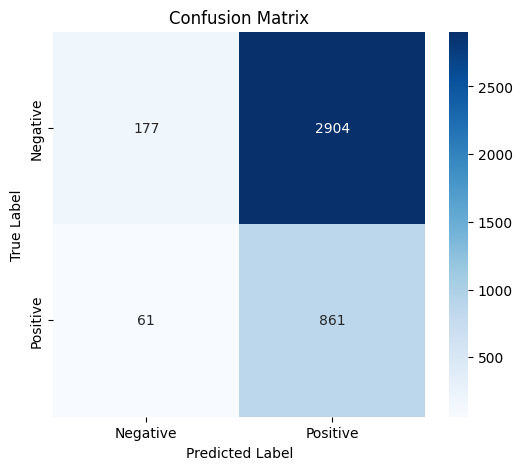

In [14]:
from utils.diagrams import plot_confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix CheXpert')
plt.show()